In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from init import readFile, split_dataset, error, reduce, CLASSES, FEATURES, plot_confusion_matrix
from k_nearest_neighbours import KNearestNeighbours, Algo

In [2]:
data, output = readFile('subject/IA3-ml_data_iris.txt', CLASSES)

In [3]:
# data = reduce(data)

In [4]:
x_train, y_train, x_test, y_test = split_dataset(data, output)

In [5]:
knn = KNearestNeighbours.fit(x_train, y_train, 6, algo = Algo.KD_TREE, leaf_size = 10)

In [6]:
print(knn.tree)

[1]
[0, 2]
[0, 0, 2, 2]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1]), array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]


In [7]:
x_test_predict = knn.predict(x_test)

In [8]:
cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))

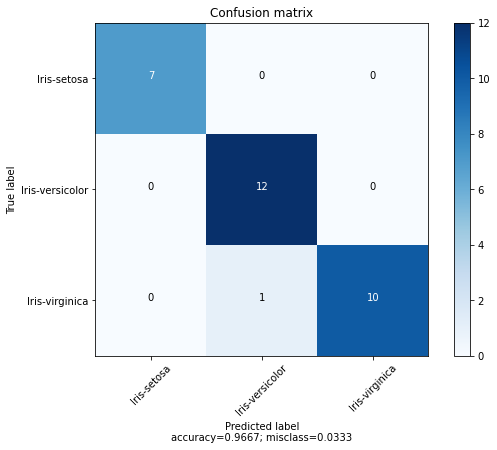

In [9]:
plot_confusion_matrix(cf_mat, CLASSES)

In [10]:
CLASSES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
FEATURES = ['sepal length (in cm)', 'sepal width (in cm)', 'petal length (in cm)', 'petal width (in cm)']
data, output = readFile('IA3-ml_data_iris.txt', CLASSES)
k_values = np.arange(1, 20, 1, int)
errors = np.zeros(len(k_values))
for i in range(len(k_values)):
    for _ in range(50):
        x_train, y_train, x_test, y_test = split_dataset(data, output)
        knn = KNearestNeighbours.fit(x_train, y_train, k_values[i], algo=Algo.KD_TREE, leaf_size=22)
        y_pred = knn.predict(x_test)
        errors[i] += error(y_test, y_pred)

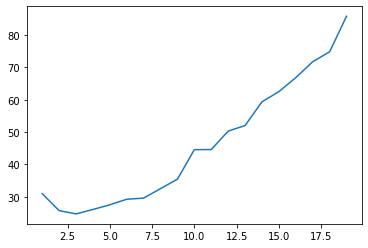

In [11]:
plt.plot(k_values, errors)